In [46]:
import json
with open('reddit_jokes.json') as f:
    data = json.load(f)

In [47]:
cleaned = []

In [48]:
items,total_length = 0,0
for item in data:
    setup = item['body']
    punch = item['title']
    total_length += len(setup) + len(punch)
    items += 1
avg = total_length/items
print(avg)

249.49776153541708


In [49]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [50]:
def nlptasks(string):
    doc = nlp(string)
    string_text, string_postags, string_dep, string_nertype = [],[],[],[]
    for token in doc:
        string_text.append(token.text)
        string_postags.append(token.tag_)
        string_dep.append(token.dep_)
        if token.ent_type_:
            string_nertype.append(token.ent_type_)
        else:
            string_nertype.append('None')
    string_text = ' '.join(string_text)
    string_postags = ' '.join(string_postags)
    string_dep = ' '.join(string_dep)
    string_nertype = ' '.join(string_nertype)
    return  string_text, string_postags, string_dep, string_nertype

In [51]:
import re
def clean(string):
    string = string.encode('ascii', 'ignore').decode('ascii')
    string = re.sub('^\[.*\]','',string)
    string = re.sub('^.*:','',string)
    string = string.strip()
    string = string.strip('\"')
    string = re.sub('\?+','?',string)
    string = re.sub('!+','!',string)
    string = re.sub('\.+','.',string)
    string = re.sub(' +',' ',string)
    string = re.sub('\(.*\)','',string)
    string = string.replace(':)','')
    string = string.replace(';)','')
    string = string.replace('*','')
    string = string.strip()
    return string

In [52]:
clean("I am a boy from India.")

'I am a boy from India.'

In [53]:
from collections import Counter
jokes_length_array = []

In [54]:
jokes_count, outliers = 0, 0
print('Length of data is',len(data))
for item in data:
    setup = item['title']
    punch = item['body']
    setup = clean(setup)
    punch = clean(punch)
    size = len(setup) + len(punch)
    if size <= 200:
        jokes_length_array.append(size)
    else:
        outliers+=1
        continue
    # removing all multi-line jokes, along with a size limit 
    if ((setup.count('\n')>1 or punch.count('\n')>1)) or size<50 or size>100:
        continue
    if setup and setup[-1]!='?':
        continue
    entry = {}
    setup_text, setup_postags, setup_dep, setup_nertype = nlptasks(setup)
    punch_text, punch_postags, punch_dep, punch_nertype = nlptasks(punch)
    entry['setup_text'] = setup_text
    entry['setup_postags'] = setup_postags
    entry['setup_dep'] = setup_dep
    entry['setup_nertype'] = setup_nertype
    entry['punch_text'] = punch_text
    entry['punch_postags'] = punch_postags
    entry['punch_dep'] = punch_dep
    entry['punch_nertype'] = punch_nertype
    cleaned.append(entry)
    jokes_count+=1
#     if jokes_count==2:
#         print(entry)
#         break
    if jokes_count%4000==0:
        print(jokes_count)
with open('cleaned_jokes.json', 'w') as fout:
    json.dump(cleaned, fout)
print(jokes_count)

Length of data is 194553
4000
8000
12000
16000
20000
24000
28000
32000
36000
40000
44000
48000
48861


In [55]:
print(outliers)
print(max(jokes_length_array))

44378
200


In [56]:
jokes_length = Counter(jokes_length_array)

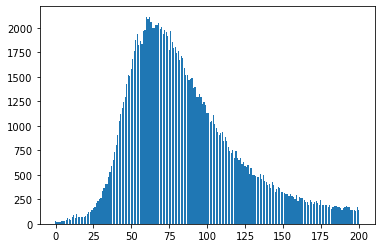

In [57]:
import matplotlib.pyplot as plt
plt.bar(jokes_length.keys(), jokes_length.values())
plt.show()

In [58]:
print(jokes_length.most_common(10))

[(60, 2115), (62, 2114), (61, 2088), (63, 2062), (68, 2049), (67, 2031), (66, 2027), (70, 2011), (65, 2000), (64, 2000)]


In [59]:
import pandas as pd

In [60]:
f = open('cleaned_jokes.json')
data = json.load(f)
df = pd.DataFrame(data)
df.to_csv('cleaned_jokes.csv')